<a href="https://colab.research.google.com/github/diegoVasquez600/Advanced_Programming/blob/main/AlgebraLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos Matemáticos para Programación Avanzada
**Materia:** Programación Avanzada | **Institución:** IU Pascual Bravo

Este notebook es una guía de referencia. Estudia la teoría, ejecuta el código y observa las gráficas. Intenta realizar variaciones en el código para entender los conceptos presentados.

# Álgebra Lineal para Machine Learning

En Machine Learning los datos tienen también representación geométrica.

Cada observación es un punto en un espacio de muchas dimensiones ($R^n$) y entrenar un modelo significa encontrar una estructura geométrica en esa nube de puntos.

En esta sección veremos cómo:

• Representar datos como vectores  
• Medir similitud entre observaciones  
• Aproximar datos con modelos lineales  
• Reducir dimensionalidad  


## Vectores

Un **vector** es un arreglo ordenado de números reales:

$x = (x_1, x_2, \dots, x_n) \in \mathbb{R}^n$

Geométricamente, un vector puede interpretarse de dos formas equivalentes:

• Como un punto en un espacio n-dimensional  
• Como una flecha que parte del origen hacia ese punto

En Machine Learning, un vector representa una **observación** o una **instancia de datos**.  
Cada componente del vector corresponde a una característica (*feature*).

Ejemplo:

$x = (altura,\ peso,\ edad)$

Operaciones importantes:

• Norma: $ ||x|| = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2} $ --> "longitud del vector"  
• Producto punto: $x \cdot y = \sum_{i=1}^{n} x_i y_i $ --> mide similitud/alineación

En ML los algoritmos comparan observaciones midiendo ángulos o distancias entre vectores.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

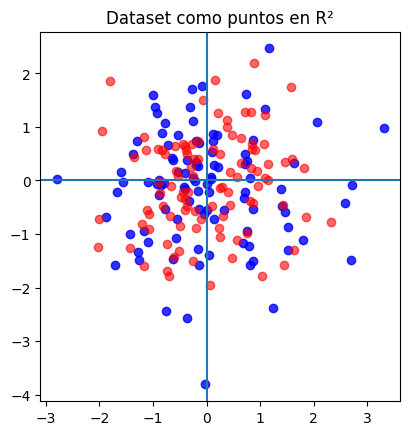

In [ ]:

np.random.seed(50)
X = np.random.randn(100,2)
Y = np.random.randn(100,2)

plt.scatter(X[:,0], X[:,1], alpha=0.8, color='blue')
plt.scatter(Y[:,0], Y[:,1], alpha=0.6, color='red')
plt.axhline(0); plt.axvline(0)
plt.gca().set_aspect('equal')
plt.title("Dataset como puntos en R²")
plt.show()


### Norma

La norma de un vector:

$||x|| = \sqrt{x_1^2 + x_2^2}$

representa la **distancia desde el origen hasta el punto**.

Es decir, la norma es la longitud geométrica del vector.

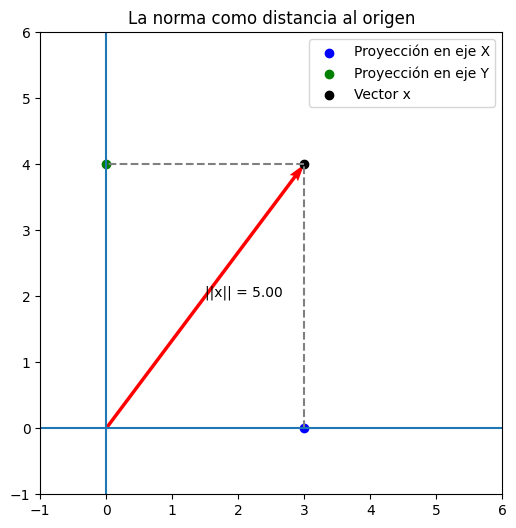

Norma calculada: 5.0


In [ ]:

x = np.array([3,4])
O = np.array([0,0])

norma = np.linalg.norm(x)

plt.figure(figsize=(6,6))

plt.quiver(O[0], O[1], x[0], x[1], angles='xy', scale_units='xy', scale=1, color='red')


proj_x = np.array([x[0], 0])   # (x1, 0)
proj_y = np.array([0, x[1]])   # (0, x2)


#plt.plot([0, x[1]], [x[1], 0], linestyle='--', color='gray')
plt.plot([x[0], x[0]], [0, x[1]], linestyle='--', color='gray')
plt.plot([x[0], 0],[x[1], x[1]], linestyle='--', color='gray')


plt.scatter(proj_x[0], proj_x[1], color='blue', label="Proyección en eje X")
plt.scatter(proj_y[0], proj_y[1], color='green', label="Proyección en eje Y")
plt.scatter(x[0], x[1], color='black', label="Vector x")


plt.text(x[0]/2, x[1]/2, f"||x|| = {norma:.2f}")

plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect('equal')

plt.xlim(-1,6)
plt.ylim(-1,6)

plt.legend()
plt.title("La norma como distancia al origen")
plt.show()


print("Norma calculada:", norma)


## Producto punto

El producto punto entre dos vectores se define como:

$x \cdot y = \sum_{i=1}^{n} x_i y_i$

su significado geométrico es:

$x \cdot y = ||x|| \, ||y|| \cos(\theta)$

donde θ es el ángulo entre los vectores.

El producto punto mide cuánto de un vector está contenido en la dirección del otro.

En particular, la proyección de un vector $x$ sobre un vector $y$

$ \frac{x \cdot y}{||y||}$

Por lo tanto:

• si los vectores apuntan en la misma dirección --> valor grande  
• si son perpendiculares --> 0  
• si apuntan en direcciones opuestas --> negativo

En Machine Learning esto aparece constantemente:

- similitud coseno (NLP, embeddings, recomendadores)
- atención en Transformers
- búsqueda semántica


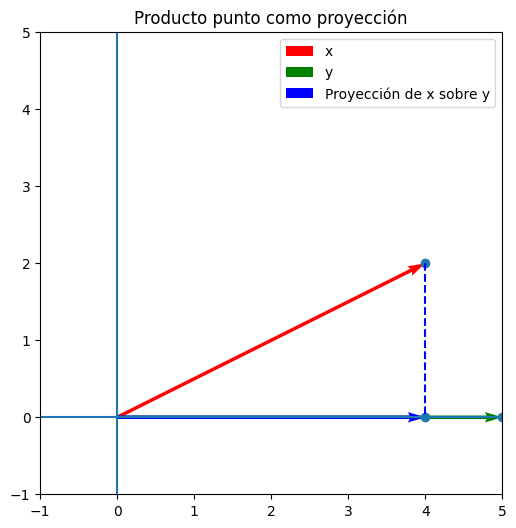

x·y = 20
||y|| = 5.0
longitud de la proyección = 4.0


In [ ]:

x = np.array([4,2])
y = np.array([5,0])


norm_y = np.linalg.norm(y)


proj = (np.dot(x,y)/norm_y**2) * y

plt.figure(figsize=(6,6))


plt.quiver(0,0,x[0],x[1],angles='xy',scale_units='xy',scale=1,label="x",color='red')


plt.quiver(0,0,y[0],y[1],angles='xy',scale_units='xy',scale=1,label="y", color='green')


plt.quiver(0,0,proj[0],proj[1],angles='xy',scale_units='xy',scale=1,label="Proyección de x sobre y", color='blue')


plt.plot([x[0],proj[0]],[x[1],proj[1]],linestyle='--', color='blue')

plt.scatter([x[0],y[0],proj[0]],[x[1],y[1],proj[1]])

plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect('equal')

plt.xlim(-1,5)
plt.ylim(-1,5)
plt.legend()
plt.title("Producto punto como proyección")
plt.show()

print("x·y =", np.dot(x,y))
print("||y|| =", norm_y)
print("longitud de la proyección =", np.dot(x,y)/norm_y)


## Vector proyección de $x$ sobre $y$

Para obtener el vector que representa la parte de $x$ que está alineada con la dirección de $y$.

Se calcula el vector unitario en la dirección de $y$:

$$
\hat{y} = \frac{y}{||y||}
$$

La **longitud de la proyección** de $x$ sobre $y$ es:

$$
\mathrm{comp}_y(x) = \frac{x\cdot y}{||y||}
$$

Esto es solo un escalar.  
Para obtener el **vector proyección**, debemos multiplicar esa longitud por la dirección de $y$:

$$
\mathrm{Proy}_y(x) =
\left(\frac{x\cdot y}{||y||}\right)\hat{y}
$$

Sustituyendo $\hat{y}$:

$$
\boxed{
\mathrm{Proy}_y(x) = \frac{x\cdot y}{||y||^2}\,y
}
$$

### Interpretación geométrica

El vector proyectado es la "sombra" de $x$ sobre la recta generada por $y$.

Se cumple:

$$
x = \mathrm{Proy}_y(x) + r
$$

donde $r$ es el **residuo** o error, y además:

$$
r \perp y
$$

es decir,

$$
r\cdot y = 0
$$


## Ejemplo: producto punto en NLP (embeddings de palabras)

En procesamiento de lenguaje natural (NLP), las palabras no se representan como texto, sino como vectores numéricos llamados **embeddings**.

Un embedding es un vector en $\mathbb{R}^n$ que captura significado semántico.

En este sentido, las palabras con significados similares serán vectores con direcciones similares.

Por lo tanto, podemos medir similitud usando el **producto punto** o la **similitud coseno**.

Si $w_1$ y $w_2$ son embeddings:

$$
\text{similitud coseno} =
\cos(\theta) =
\frac{w_1 \cdot w_2}{||w_1||\,||w_2||}
$$

Interpretación:

• cercano a 1 --> significados muy parecidos  
• cercano a 0--> no relacionados  
• negativo --> opuestos semánticos


In [ ]:

# embeddings simulados (3 dimensiones)
gato = np.array([1.0, 0.9, 0.8])
perro = np.array([0.9, 1.0, 0.7])
carro = np.array([-0.8, 0.2, 0.9])
felino = np.array([1.0, 0.8, 0.75])

def cos_sim(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

print("gato vs perro:", cos_sim(gato,perro))
print("gato vs felino:", cos_sim(gato,felino))
print("gato vs carro:", cos_sim(gato,carro))


gato vs perro: 0.9941800472158778
gato vs felino: 0.9987274443722958
gato vs carro: 0.05233880753195088


## Matrices

Un dataset real contiene muchas observaciones:

$$
X =
\begin{bmatrix}
--- x^{(1)} --- \\
--- x^{(2)} --- \\
\vdots \\
--- x^{(n)} ---
\end{bmatrix}
$$

donde cada fila es un vector de características (*features*).

Por tanto:

• filas--> observaciones  
• columnas--> variables

Esta es la estructura que usan todas las librerías de Machine Learning.


In [ ]:

X = np.array([[170,65],
              [180,72],
              [160,55],
              [175,70]])

print(X)
print("shape:", X.shape)


[[170  65]
 [180  72]
 [160  55]
 [175  70]]
shape: (4, 2)


## Multiplicación matriz-vector

Si $A ∈ R^{m×n}$ y $x ∈ R^n$:


$y = Ax$


Cada fila de la matriz realiza un producto punto con el vector.

Por lo tanto, una matriz aplica múltiples detectores lineales al mismo dato.

Esto puede ser lo que hace una capa densa (Dense Layer) en una red neuronal.


In [ ]:

A = np.array([[1,0],
              [0,1],
              [1,1]])

x = np.array([2,1])

y = A @ x
print("Resultado:", y)

for fila in A:
    print("producto punto:", np.dot(fila,x))


Resultado: [2 1 3]
producto punto: 2
producto punto: 1
producto punto: 3


## Matriz como transformación geométrica

Una matriz es una función:


$T(x) = Ax$

que transforma todos los vectores del espacio.

Puede rotar, escalar o deformar


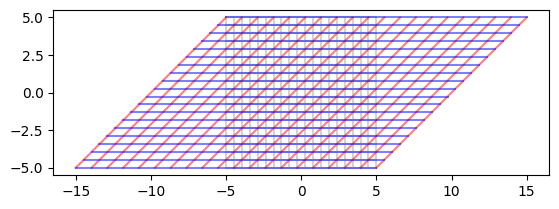

In [ ]:

# matriz transformación
A = np.array([[2,1],
              [0,1]])

# crear una grilla
x = np.linspace(-5,5,20)
y = np.linspace(-5,5,20)

for i in x:
    plt.plot([i,i],[-5,5],color='lightgray')
for j in y:
    plt.plot([-5,5],[j,j],color='lightgray')


for i in x:
    pts = A @ np.array([[i]*20,y])
    plt.plot(pts[0],pts[1],color='red',alpha=0.5)

for j in y:
    pts = A @ np.array([x,[j]*20])
    plt.plot(pts[0],pts[1],color='blue',alpha=0.5)

plt.gca().set_aspect('equal')
plt.show()


## Interpretación geométrica de una matriz como transformación del espacio

En este ejemplo se aplica una transformación (matriz) a **todo el plano**.

La idea matemática es:

$$
T(x) = Ax
$$

Normalmente se aplica $A$ a un vector individual. Aquí se aplica $A$ a muchos vectores al mismo tiempo (todos los puntos de una grilla del plano).

Por eso se observa una deformación del espacio.

---

## Matriz de transformación

La matriz utilizada es:

$$
A =
\begin{bmatrix}
2 & 1 \\
0 & 1
\end{bmatrix}
$$

Si tomamos un vector cualquiera:

$$
(x,y)
$$

entonces:

$$
A
\begin{pmatrix}
x\\
y
\end{pmatrix}
=
\begin{pmatrix}
2x + y\\
y
\end{pmatrix}
$$

### Interpretación geométrica

- La coordenada $y$ permanece igual
- La coordenada $x$ cambia dependiendo del valor de $y$

Esto se llama **cizallamiento (shear)**.

No es una rotación ni una escala pura: es una deformación del espacio.

---

## La grilla del plano

Para visualizar la transformación, primero dibujamos una grilla cartesiana.

Las rectas:

$$
x = c
$$

son las líneas verticales.

Las rectas:

$$
y = c
$$

son las líneas horizontales.

La grilla representa el espacio vectorial $\mathbb{R}^2$.

Cada punto de la grilla es un vector.

---

## Aplicar la matriz a la grilla

Para cada recta vertical construimos los puntos:

$$
(i,y_1), (i,y_2), (i,y_3), \dots
$$

y aplicamos:

$$
T(x) = Ax
$$

La recta original deja de ser vertical: la matriz transforma todos sus puntos.

Luego repetimos lo mismo para las rectas horizontales:

$$
(x_1,j), (x_2,j), (x_3,j), \dots
$$

Cada punto se transforma mediante la multiplicación matricial.

El resultado son nuevas curvas o rectas en otras direcciones.

---



Una matriz no transforma un vector, sino que, más bien, transforma todo el espacio.

Cada punto del plano es un vector:

$$
T:\mathbb{R}^2 \rightarrow \mathbb{R}^2
$$

La grilla es simplemente una manera de visualizar la acción de la función sobre todos los vectores simultáneamente.


El aprendizaje automático muchas veces busca encontrar una transformación del espacio donde los datos se vuelven separables.


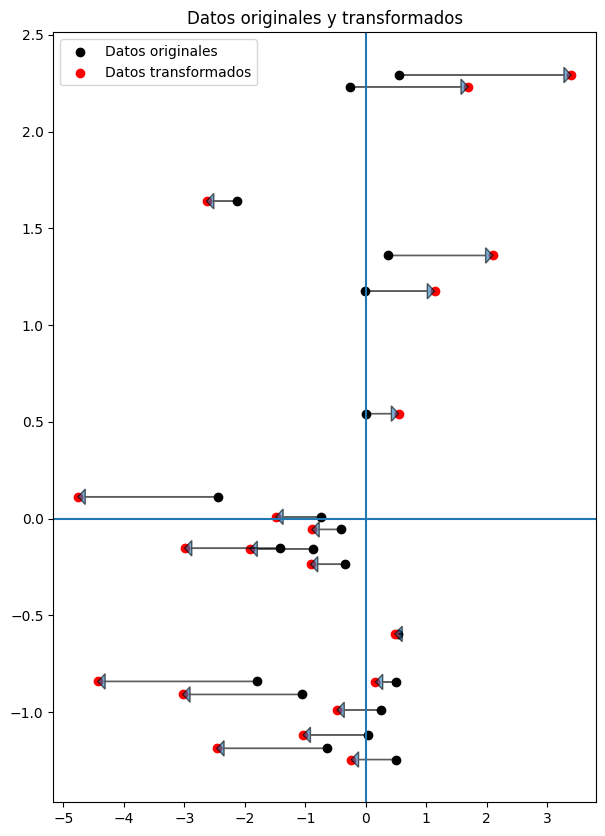

In [ ]:

A = np.array([[2,1],
              [0,1]])


np.random.seed(2)
X = np.random.randn(20,2)


X_trans = (A @ X.T).T

plt.figure(figsize=(7,10))


plt.scatter(X[:,0], X[:,1], color='black', label='Datos originales')


plt.scatter(X_trans[:,0], X_trans[:,1], color='red', label='Datos transformados')


for i in range(len(X)):
    plt.arrow(X[i,0], X[i,1],
              X_trans[i,0]-X[i,0],
              X_trans[i,1]-X[i,1],
              head_width=0.08,
              length_includes_head=True,
              alpha=0.6)


plt.axhline(0)
plt.axvline(0)
#plt.gca().set_aspect('equal')

plt.title("Datos originales y transformados")
plt.legend()
plt.show()


In [ ]:
X.shape

(20, 2)

## Direcciones especiales de una transformación: Autovalores y Autovectores

Encontramos que una matriz transforma el espacio completo:

$$
T(x) = Ax
$$

La pregunta importante ahora es:

¿La matriz afecta todas las direcciones del plano de la misma manera?

¿O existen direcciones especiales que la transformación preserve?


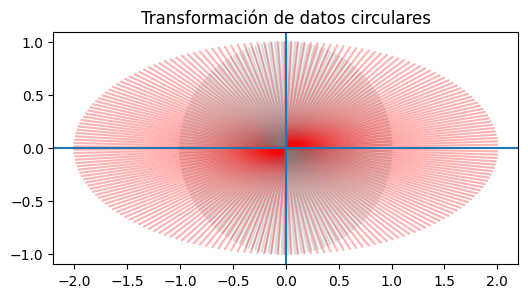

In [ ]:

A = np.array([[2,0],
              [0,1]])

angles = np.linspace(0,2*np.pi,200)

plt.figure(figsize=(6,6))

for t in angles:
    v = np.array([np.cos(t), np.sin(t)])
    w = A @ v

    plt.plot([0,v[0]],[0,v[1]],color='gray',alpha=0.3)
    plt.plot([0,w[0]],[0,w[1]],color='red',alpha=0.3)

plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect('equal')
plt.title("Transformación de datos circulares")
plt.show()


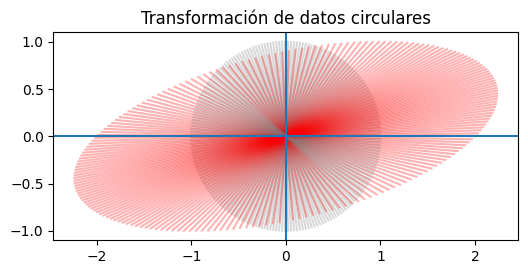

In [ ]:

A = np.array([[2,1],
              [0,1]])

angles = np.linspace(0,2*np.pi,200)

plt.figure(figsize=(6,6))

for t in angles:
    v = np.array([np.cos(t), np.sin(t)])
    w = A @ v


    plt.plot([0,v[0]],[0,v[1]],color='gray',alpha=0.3)


    plt.plot([0,w[0]],[0,w[1]],color='red',alpha=0.3)

plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect('equal')
plt.title("Transformación de datos circulares")
plt.show()


## Direcciones invariantes

Buscamos vectores cuya dirección no cambie al aplicar la matriz.

Es decir, queremos un vector $v$ tal que:

la transformación $Av$ siga apuntando en la misma dirección que $v$.

La única forma en que eso puede ocurrir es:

$$
Av = \lambda v
$$

donde $\lambda$ es un número real.

## Autovectores y autovalores

Si existe un vector no nulo $v$ tal que:

$$
Av = \lambda v
$$

entonces:

• $v$ se llama **autovector** (eigenvector)  
• $\lambda$ se llama **autovalor** (eigenvalue)

Interpretación:

El autovector es una dirección que la matriz no rota.  
El autovalor indica cuánto se estira o se encoge esa dirección.



In [ ]:
eigvals, eigvecs = np.linalg.eig(A)

print("Autovalores:\n", eigvals)
print("\nAutovectores:\n", eigvecs) #Cada columna es un autovector

Autovalores:
 [2. 1.]

Autovectores:
 [[1. 0.]
 [0. 1.]]


Autovalores:
 [2. 1.]

Autovectores:
 [[1. 0.]
 [0. 1.]]


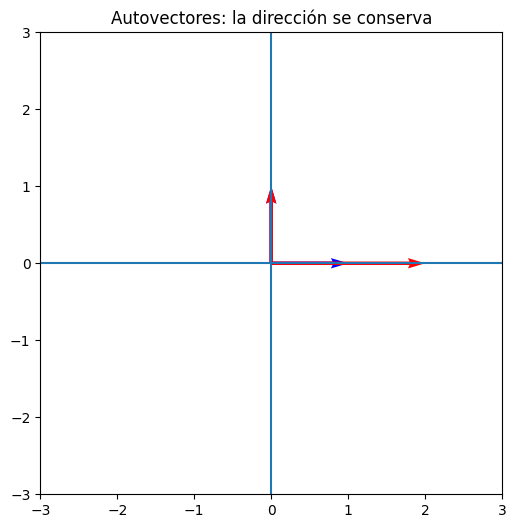

In [ ]:
plt.figure(figsize=(6,6))
print("Autovalores:\n", eigvals)
print("\nAutovectores:\n", eigvecs)

for i in range(2):
    v = eigvecs[:,i]
    w = A @ v

    # autovector
    plt.quiver(0,0,v[0],v[1],
               angles='xy',
               scale_units='xy',
               scale=1,
               color='blue')

    # vector transformado
    plt.quiver(0,0,w[0],w[1],
               angles='xy',
               scale_units='xy',
               scale=1,
               color='red')

plt.axhline(0)
plt.axvline(0)

plt.xlim(-3,3)
plt.ylim(-3,3)

plt.gca().set_aspect('equal')
plt.title("Autovectores")
plt.show()


Para que exista una solución no trivial:

$$
Av = \lambda v
$$

podemos escribir:

$$
(A - \lambda I)v = 0
$$

Esto es un sistema homogéneo.

Tiene solución no nula solo cuando:

$$
\det(A - \lambda I) = 0
$$

Esta ecuación se llama **ecuación característica**.


## Aplicación en machine learning

Supongamos un dataset.

Los datos no se distribuyen igual en todas las direcciones.
Existe una dirección donde varían más.

La matriz de covarianza captura esa información:

$$
\Sigma = \frac{1}{n}X^TX
$$

Los autovectores de $\Sigma$ son las direcciones principales del dataset.

El autovector con mayor autovalor es la dirección de máxima varianza.

Esto es exactamente el algoritmo PCA (Principal Component Analysis).


## Varianza (1 dimensión)

Supongamos una sola variable (por ejemplo, altura):

$$
x_1, x_2, x_3, \dots, x_n
$$

La varianza se define como:

$$
\mathrm{Var}(x)=\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2
$$

donde $\bar{x}$ es el promedio.

Interpretación:

• varianza grande → los datos están dispersos  
• varianza pequeña → los datos están concentrados

Geométricamente:

La varianza mide qué tan "larga" es la nube de puntos sobre ese eje.

## Covarianza: 2 dimensiones

Ahora consideremos dos características, por ejemplo:

• altura  
• peso

Queremos saber la relación entre ambas variables

Definimos la covarianza:

$$
\mathrm{Cov}(x,y)=\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})
$$

Interpretación:

• positiva → crecen juntas  
• negativa → una sube cuando la otra baja  
• cercana a 0 → no están relacionadas

Geométricamente:

La covarianza mide la **inclinación de la nube de puntos**.


## Matriz de covarianza

Si cada observación es un vector:

$$
x=
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
$$

construimos la matriz de covarianza:

$$
\Sigma =
\begin{bmatrix}
\mathrm{Var}(x_1) & \mathrm{Cov}(x_1,x_2)\\
\mathrm{Cov}(x_2,x_1) & \mathrm{Var}(x_2)
\end{bmatrix}
$$

En general, si $X$ es el dataset centrado (restando la media a cada columna):

$$
\Sigma = \frac{1}{n}X^TX
$$

La matriz de covarianza describe completamente la forma geométrica del dataset.


La nube de datos normalmente no forma un círculo, sino una **elipse**.

Esa elipse tiene:

• una dirección larga (más variación)  
• una dirección corta (menos variación)

La matriz de covarianza codifica exactamente esa elipse.


Los autovectores de $\Sigma$ son los ejes principales de la elipse.

Los autovalores indican cuánto se extiende la nube de datos en cada dirección.




## PCA

El algoritmo PCA (Principal Component Analysis) hace lo siguiente:

1. Calcula la matriz de covarianza
2. Encuentra sus autovectores
3. Proyecta los datos sobre esas direcciones

El autovector con mayor autovalor es la dirección donde los datos varían más.


PCA encuentra el sistema de coordenadas donde los datos están mejor representados.


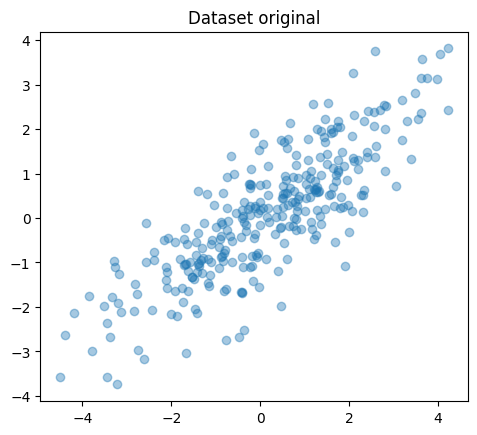

In [ ]:

np.random.seed(0)

data = np.random.multivariate_normal(
    mean=[0,0],
    cov=[[3,2],[2,2]],
    size=300
)

plt.scatter(data[:,0], data[:,1], alpha=0.4)
plt.gca().set_aspect('equal')
plt.title("Dataset original")
plt.show()


In [ ]:
mean = np.mean(data, axis=0)
X = data - mean


In [ ]:
cov_matrix = np.cov(X.T)
print("Matriz de covarianza:\n", cov_matrix)

Matriz de covarianza:
 [[3.07492985 2.05600836]
 [2.05600836 2.03732628]]


Autovalores:
 [4.67658219 0.43567394]

Autovectores:
 [[ 0.78888067 -0.61454641]
 [ 0.61454641  0.78888067]]


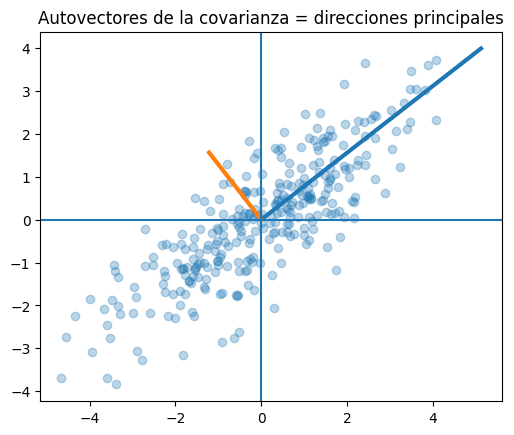

In [ ]:
plt.scatter(X[:,0], X[:,1], alpha=0.3)

for i in range(2):
    v = eigvecs[:,i] * 3 * np.sqrt(eigvals[i])
    plt.plot([0, v[0]], [0, v[1]], linewidth=3)

plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect('equal')
plt.title("Autovectores de la covarianza = direcciones principales")
plt.show()


In [ ]:
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
print(eigvals)
print(eigvecs)

[4.67658219 0.43567394]
[[ 0.78888067 -0.61454641]
 [ 0.61454641  0.78888067]]


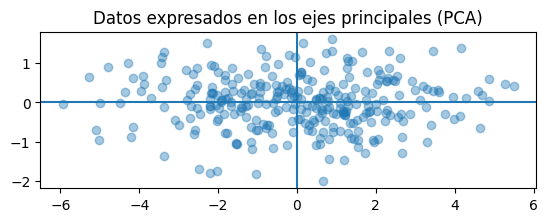

In [ ]:
Z = X @ eigvecs
plt.scatter(Z[:,0], Z[:,1], alpha=0.4)
plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect('equal')
plt.title("Datos expresados en los ejes principales (PCA)")
plt.show()


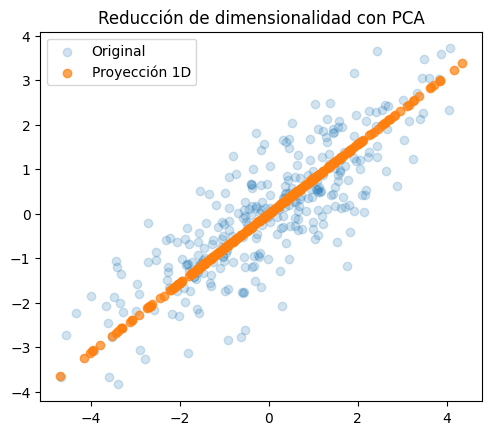

In [ ]:
Z_reduced = Z[:,0]
X_approx = np.outer(Z_reduced, eigvecs[:,0])

plt.scatter(X[:,0], X[:,1], alpha=0.2, label="Original")
plt.scatter(X_approx[:,0], X_approx[:,1], alpha=0.7, label="Proyección 1D")
plt.legend()
plt.gca().set_aspect('equal')
plt.title("Reducción de dimensionalidad con PCA")
plt.show()

## Problemas del PCA clásico

Para aplicar PCA hicimos:

$$
\Sigma = \frac{1}{n}X^TX
$$

y luego se calcularon los autovectores de la matriz de covarianza.

Sin embargo, en problemas reales aparecen dificultades:

• el número de características puede ser muy grande  
• la matriz $X^TX$ puede ser enorme  
• puede ser numéricamente inestable  
• incluso puede no ser invertible

¿Se pueden encontrar las direcciones principales directamente desde los datos, sin construir la matriz de covarianza?


---

## Descomposición en Valores Singulares (SVD)


Cualquier matriz de datos $X$ puede descomponerse como:

$$
X = U\Sigma V^T
$$

donde:

• $V$ contiene las direcciones principales del dataset  
• $\Sigma$ contiene la importancia de cada dirección  
• $U$ describe cómo se expresan los datos en esas direcciones

Interpretación geométrica:

1) $V^T$ rota los datos hacia sus ejes naturales  
2) $\Sigma$ los escala según su importancia  
3) $U$ ubica cada observación en su nueva posición


In [ ]:
U, S, Vt = np.linalg.svd(X)

print("Valores singulares:\n", S)


Valores singulares:
 [37.393824   11.41343542]


Los valores singulares indican cuánta información contiene cada dirección.

De hecho, se cumple:

$$
\lambda_i = S_i^2
$$

donde $\lambda_i$ son los autovalores de la matriz de covarianza.

Esto significa:

La varianza de los datos está contenida en los valores singulares.


In [ ]:
print("Autovectores de PCA:\n", eigvecs)
print("\nVectores V obtenidos por SVD:\n", Vt.T)


Autovectores de PCA:
 [[ 0.78888067 -0.61454641]
 [ 0.61454641  0.78888067]]

Vectores V obtenidos por SVD:
 [[ 0.78888067  0.61454641]
 [ 0.61454641 -0.78888067]]



Las columnas de $V$ coinciden (salvo signo) con los autovectores obtenidos mediante PCA.

Por lo tanto:

$$
\text{PCA} = \text{SVD aplicado al dataset}
$$

Es una forma computacionalmente estable de encontrar las direcciones principales.


In [ ]:
Z_svd = X @ Vt.T

La matriz:

$$
Z = XV
$$

representa los datos expresados en el sistema de coordenadas natural del dataset.

Es exactamente el mismo resultado obtenido previamente con PCA.


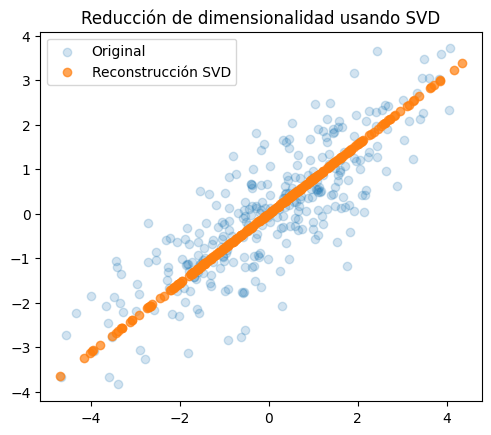

In [ ]:
Z_reduced_svd = Z_svd[:,0]
X_approx_svd = np.outer(Z_reduced_svd, Vt.T[:,0])

plt.scatter(X[:,0], X[:,1], alpha=0.2, label="Original")
plt.scatter(X_approx_svd[:,0], X_approx_svd[:,1], alpha=0.7, label="Reconstrucción SVD")
plt.legend()
plt.gca().set_aspect('equal')
plt.title("Reducción de dimensionalidad usando SVD")
plt.show()
